In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import yfinance as yf  
from scipy import stats
import quandl
import pandas as pd
from matplotlib.pyplot import figure
from scipy.stats import probplot

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


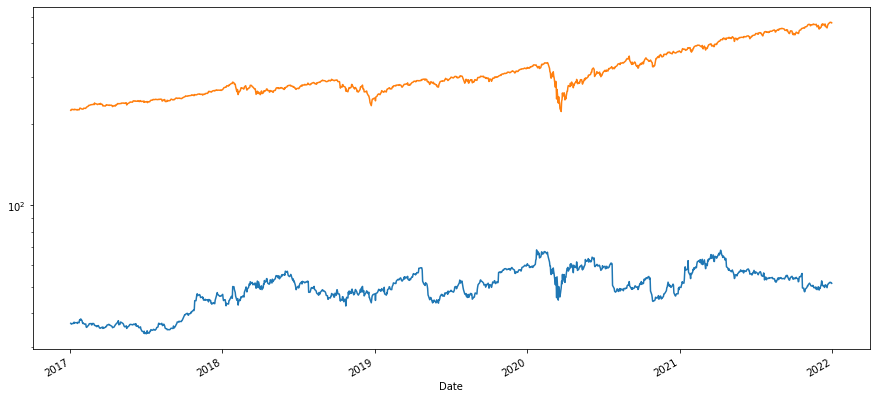

In [10]:
# Stock price plotted against time

start = '2017-01-01'
end = '2022-01-01'

aapl = yf.download('INTC', start, end)
msft = yf.download('SPY', start, end)

aapl['Close'].plot(label = 'INTC', figsize = (15,7))
msft['Close'].plot(label = 'SPY')

plt.plot()
plt.yscale('log')

[*********************100%***********************]  1 of 1 completed


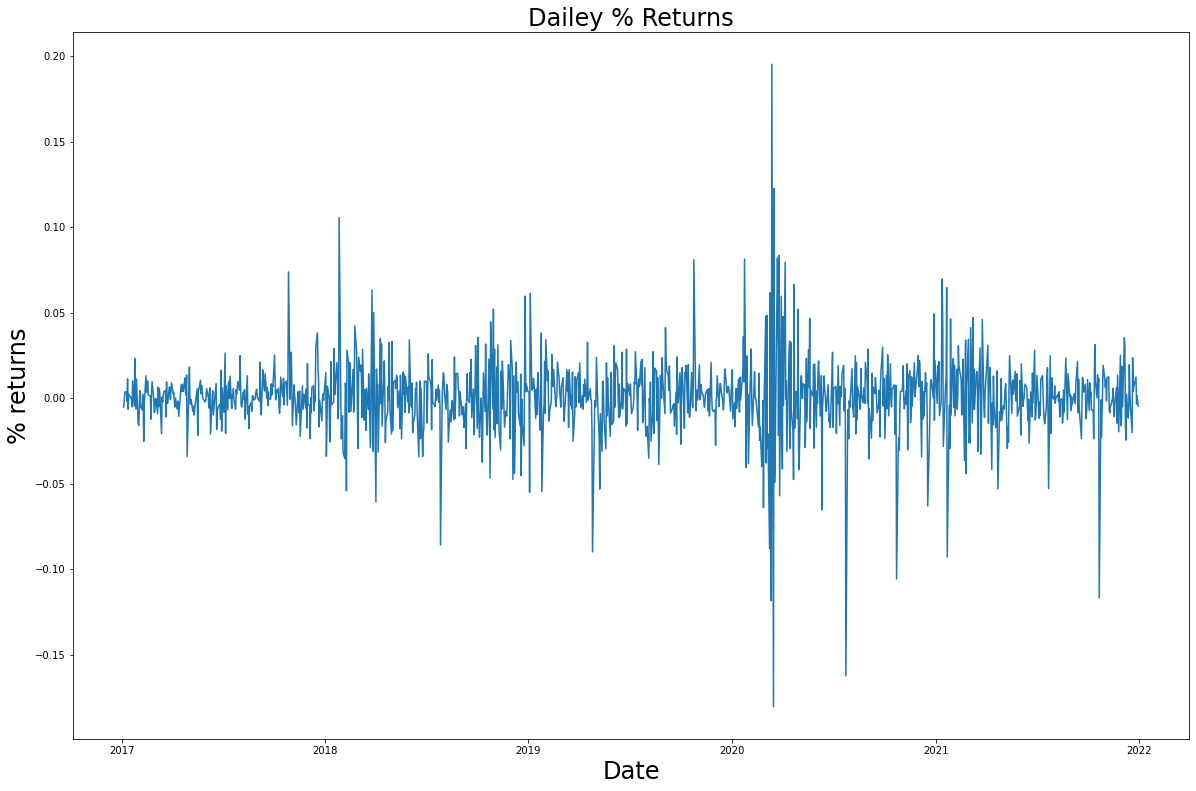

In [11]:
# Basic Daily returns plot based on %

intc = yf.download('INTC',start, end,)

Close = intc['Close']
dailey_changes = Close.pct_change(periods=1)

plt.figure(figsize=(20,13))
plt.xlabel('Date', size=24)
plt.ylabel('% returns', size=24)
plt.title('Dailey % Returns', size=24)
plt.plot(dailey_changes)

AttributeError: 'Rectangle' object has no property 'normed'

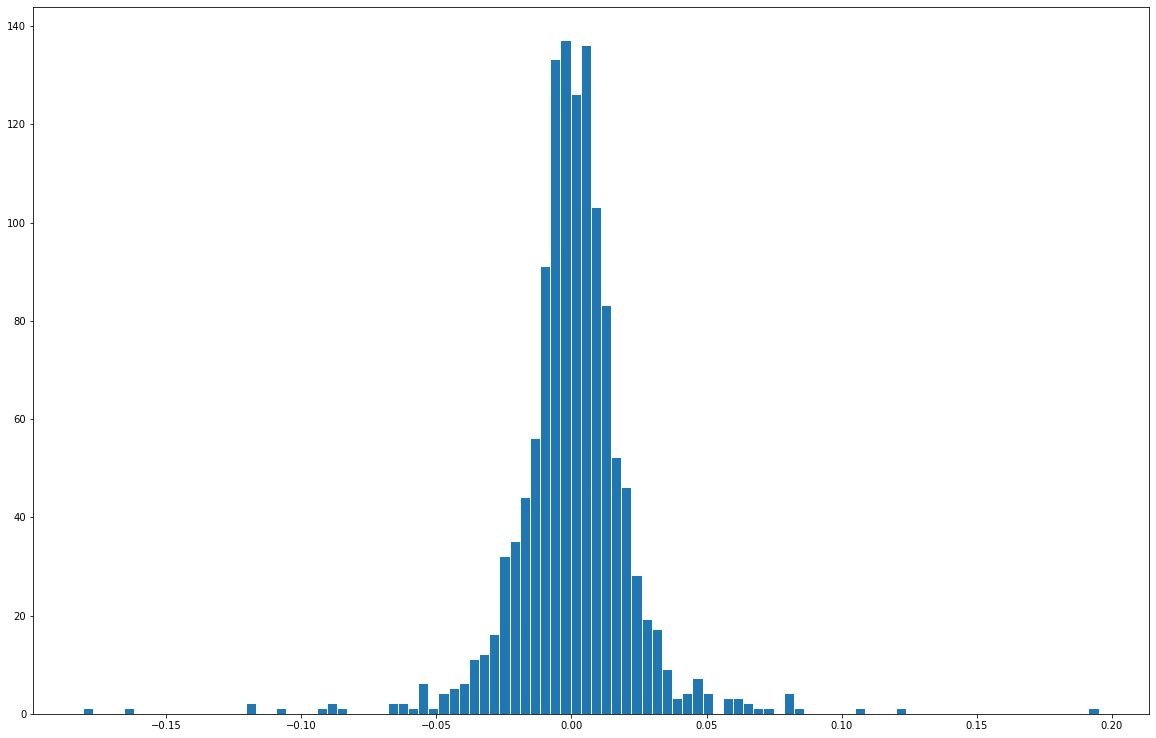

In [12]:
#Histogram of dailey % returns

dailey_changes.hist(bins=100, histtype='bar', rwidth=0.9, normed=True, figsize=(20, 13))

In [13]:
dailey_changes.describe()

count    1258.000000
mean        0.000512
std         0.021837
min        -0.180415
25%        -0.008251
50%         0.000553
75%         0.010006
max         0.195213
Name: Close, dtype: float64

In [14]:
time_period = 10
df_stock = yf.download(tickers = 'INTC SPY', period = '10y', interval = '1d', group_by = 'ticker')

intc = df_stock['INTC'][['Close']].dropna()

max_index = len(intc['Close'])


intc_cagr = np.power((intc['Close'].iloc[max_index -1]/intc['Close'].iloc[0]), (1/time_period)) - 1
print(intc_cagr)


[*********************100%***********************]  2 of 2 completed
0.06675854039522511


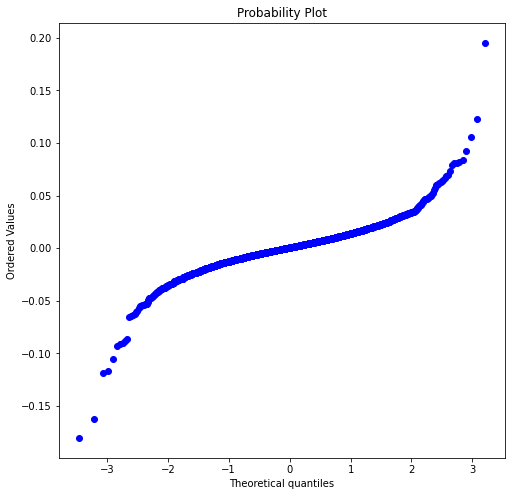

In [22]:
daily_changes2 = intc.pct_change(periods=1)

figure = plt.figure(figsize=(8, 8))

ax = figure.add_subplot(111)

stats.probplot(daily_changes2['Close'], dist='norm', plot=ax)

plt.show();